In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import roc_curve, roc_auc_score, confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.compose import ColumnTransformer
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from imblearn.under_sampling import RandomUnderSampler
from sklearn.impute import SimpleImputer

import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# Load the dataset
df = pd.read_csv('/Users/shubham/Documents/Insurance/car_insurance_claim.csv')

In [3]:
df.head()

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,60.0,0,11.0,"$67,349",No,$0,z_No,...,Minivan,yes,"$4,461",2,No,3,$0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,"$91,449",No,"$257,252",z_No,...,Minivan,yes,$0,0,No,0,$0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,"$52,881",No,$0,z_No,...,Van,yes,$0,0,No,2,$0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,"$16,039",No,"$124,191",Yes,...,z_SUV,no,"$38,690",2,No,3,$0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,"$306,251",Yes,...,Minivan,yes,$0,0,No,0,$0,6.0,0,Highly Urban/ Urban


In [4]:
df.describe()

,ID,KIDSDRIV,AGE,HOMEKIDS,YOJ,TRAVTIME,TIF,CLM_FREQ,MVR_PTS,CAR_AGE,CLAIM_FLAG
count,1.030200e+04,10302.000000,10295.000000,10302.000000,9754.000000,10302.000000,10302.000000,10302.000000,10302.000000,9663.000000,10302.000000
mean,4.956631e+08,0.169288,44.837397,0.720443,10.474062,33.416424,5.329159,0.800718,1.710153,8.298148,0.266550
std,2.864675e+08,0.506512,8.606445,1.116323,4.108943,15.869687,4.110795,1.154079,2.159015,5.714450,0.442177
min,6.317500e+04,0.000000,16.000000,0.000000,0.000000,5.000000,1.000000,0.000000,0.000000,-3.000000,0.000000
25%,2.442869e+08,0.000000,39.000000,0.000000,9.000000,22.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,4.970043e+08,0.000000,45.000000,0.000000,11.000000,33.000000,4.000000,0.000000,1.000000,8.000000,0.000000
75%,7.394551e+08,0.000000,51.000000,1.000000,13.000000,44.000000,7.000000,2.000000,3.000000,12.000000,1.000000
max,9.999264e+08,4.000000,81.000000,5.000000,23.000000,142.000000,25.000000,5.000000,13.000000,28.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ID          10302 non-null  int64  
 1   KIDSDRIV    10302 non-null  int64  
 2   BIRTH       10302 non-null  object 
 3   AGE         10295 non-null  float64
 4   HOMEKIDS    10302 non-null  int64  
 5   YOJ         9754 non-null   float64
 6   INCOME      9732 non-null   object 
 7   PARENT1     10302 non-null  object 
 8   HOME_VAL    9727 non-null   object 
 9   MSTATUS     10302 non-null  object 
 10  GENDER      10302 non-null  object 
 11  EDUCATION   10302 non-null  object 
 12  OCCUPATION  9637 non-null   object 
 13  TRAVTIME    10302 non-null  int64  
 14  CAR_USE     10302 non-null  object 
 15  BLUEBOOK    10302 non-null  object 
 16  TIF         10302 non-null  int64  
 17  CAR_TYPE    10302 non-null  object 
 18  RED_CAR     10302 non-null  object 
 19  OLDCLAIM    10302 non-nul

In [6]:
num_unique_values = df.nunique()

# Print the number of unique values for each column
print("Number of unique values for each column:")
print(num_unique_values)

Number of unique values for each column:
ID            8753
KIDSDRIV         5
BIRTH         6560
AGE             61
HOMEKIDS         6
YOJ             21
INCOME        8151
PARENT1          2
HOME_VAL      6334
MSTATUS          2
GENDER           2
EDUCATION        5
OCCUPATION       8
TRAVTIME       100
CAR_USE          2
BLUEBOOK      2985
TIF             23
CAR_TYPE         6
RED_CAR          2
OLDCLAIM      3545
CLM_FREQ         6
REVOKED          2
MVR_PTS         14
CLM_AMT       2346
CAR_AGE         30
CLAIM_FLAG       2
URBANICITY       2
dtype: int64


In [7]:
# Create a SimpleImputer object with strategy='mean'
imputer_mean = SimpleImputer(strategy='mean')

# Identify columns with missing values
columns_with_missing = df.columns[df.isnull().any()]

# Replace missing values with mean for numerical columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
columns_to_impute = list(set(columns_with_missing) & set(numerical_columns))
df[columns_to_impute] = imputer_mean.fit_transform(df[columns_to_impute])

# Check if there are any missing values left
missing_values_after_imputation_mean = df.isnull().sum()
print("Missing values after imputation with mean:")
print(missing_values_after_imputation_mean)

Missing values after imputation with mean:
ID              0
KIDSDRIV        0
BIRTH           0
AGE             0
HOMEKIDS        0
YOJ             0
INCOME        570
PARENT1         0
HOME_VAL      575
MSTATUS         0
GENDER          0
EDUCATION       0
OCCUPATION    665
TRAVTIME        0
CAR_USE         0
BLUEBOOK        0
TIF             0
CAR_TYPE        0
RED_CAR         0
OLDCLAIM        0
CLM_FREQ        0
REVOKED         0
MVR_PTS         0
CLM_AMT         0
CAR_AGE         0
CLAIM_FLAG      0
URBANICITY      0
dtype: int64


In [8]:
# Find columns with missing values
columns_with_missing_values = df.columns[df.isnull().any()]

# Display the columns with missing values and their counts
print("Columns with missing values:")
print(df[columns_with_missing_values].isnull().sum())

Columns with missing values:
INCOME        570
HOME_VAL      575
OCCUPATION    665
dtype: int64


In [9]:
# Data preprocessing
columns_to_convert = ['INCOME', 'HOME_VAL', 'BLUEBOOK', 'OLDCLAIM', 'CLM_AMT']
for col in columns_to_convert:
    df[col] = df[col].replace('[\$,]', '', regex=True).astype(float)

object_columns = df.select_dtypes(include=['object']).columns
for col in object_columns:
    if 'z_' in df[col].unique():
        df[col] = df[col].replace('z_', '', regex=True)
        df[col] = df[col].astype('category')

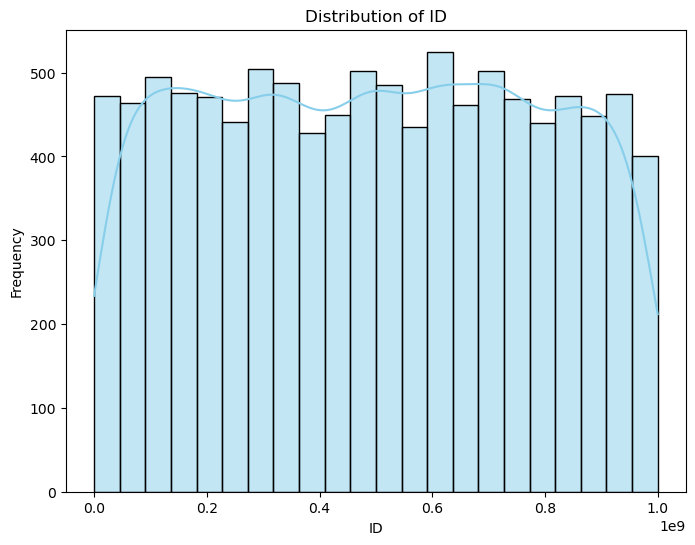

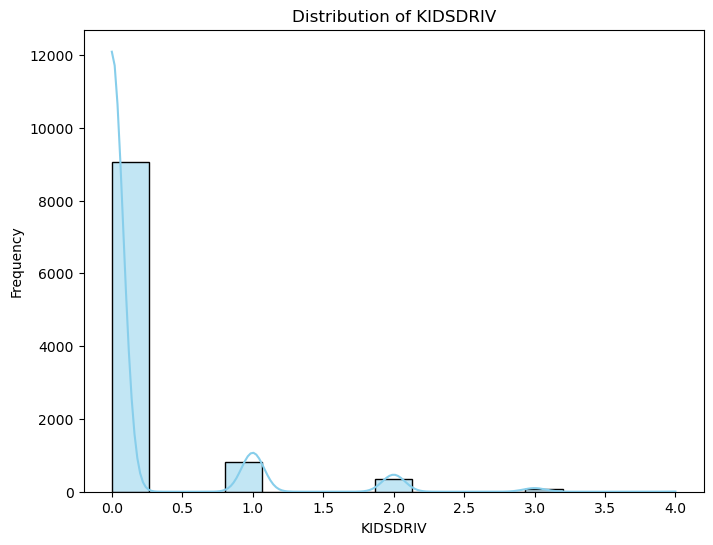

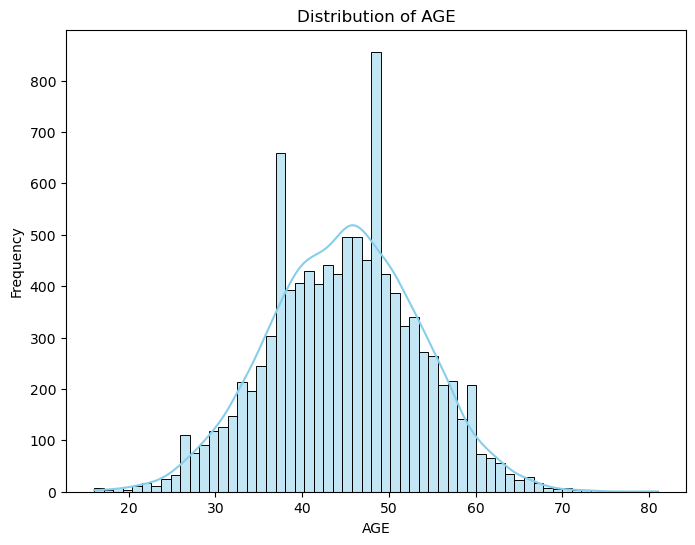

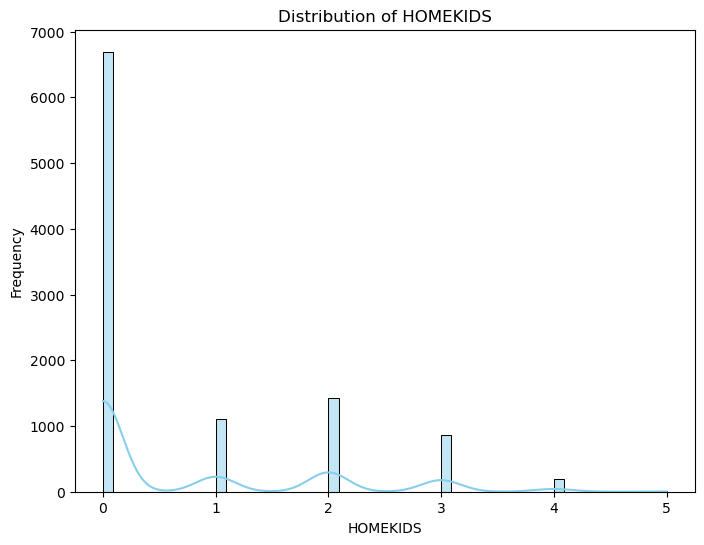

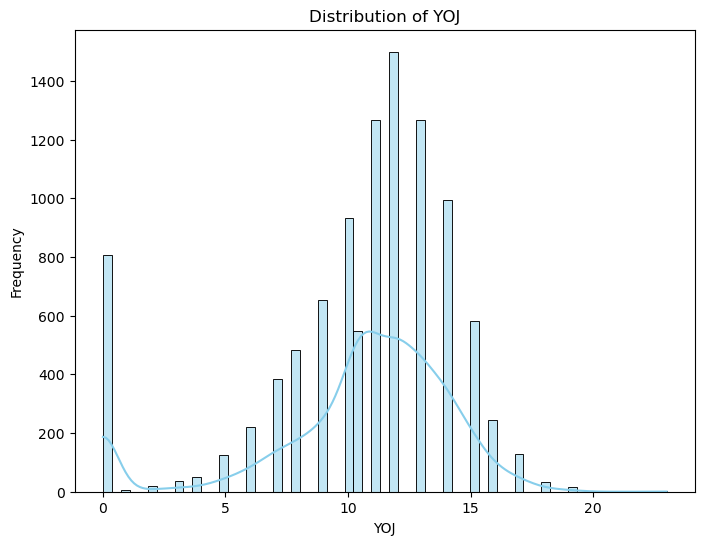

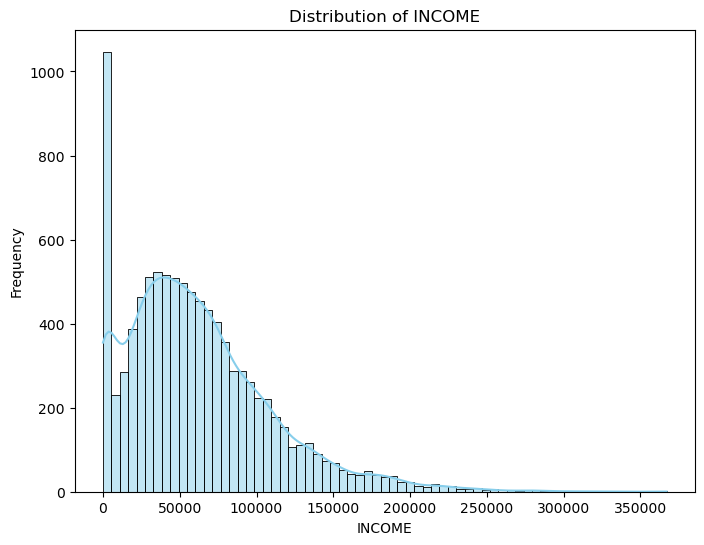

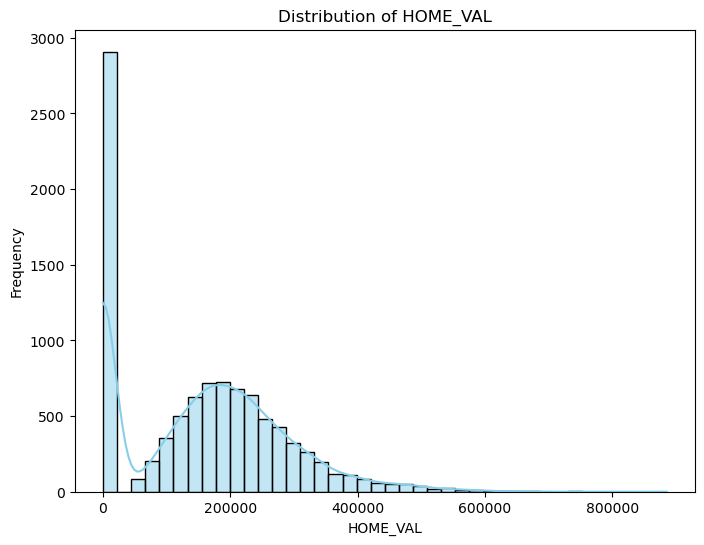

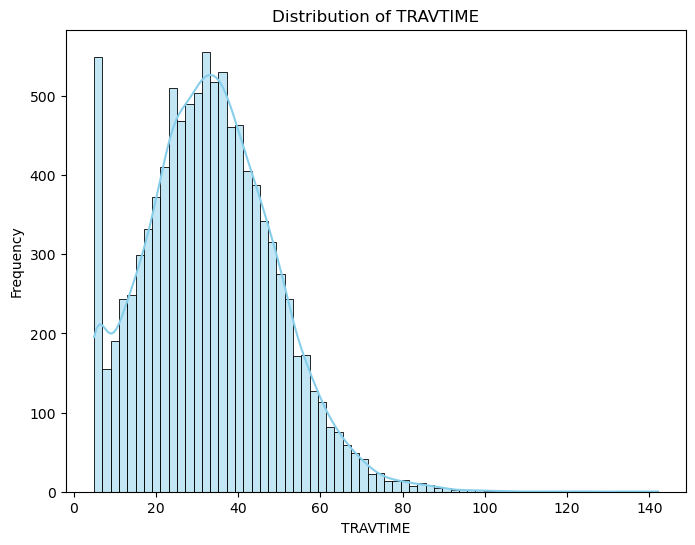

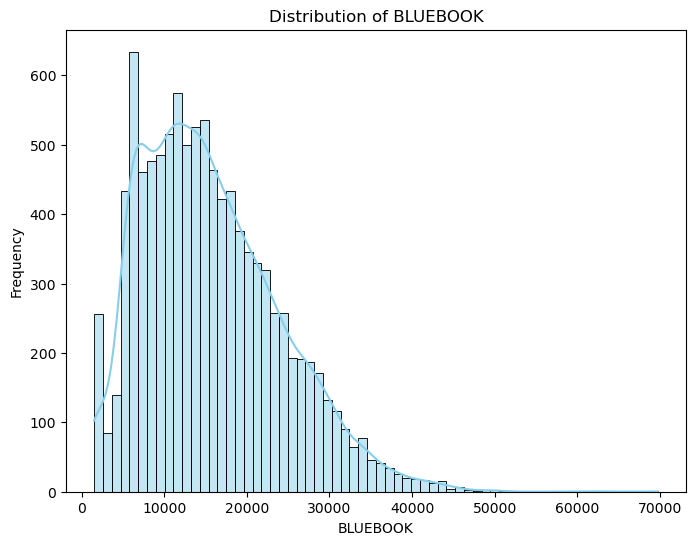

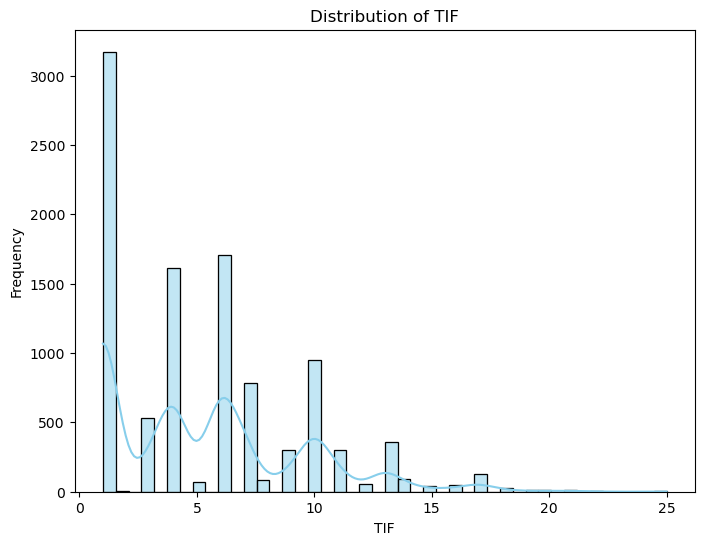

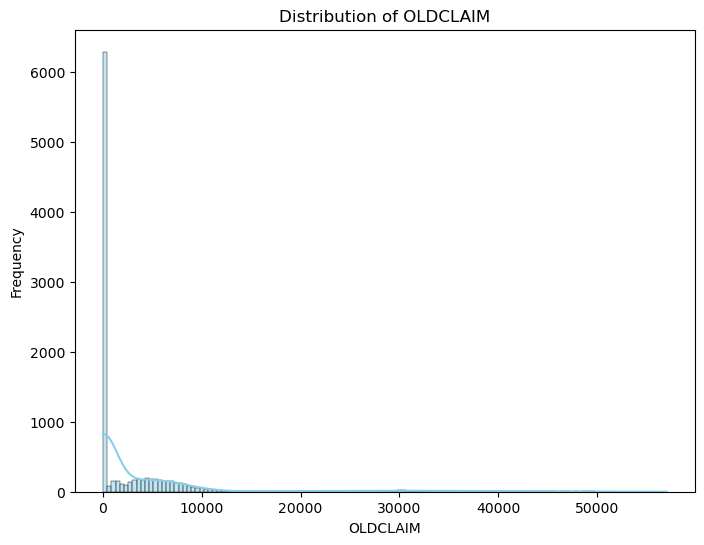

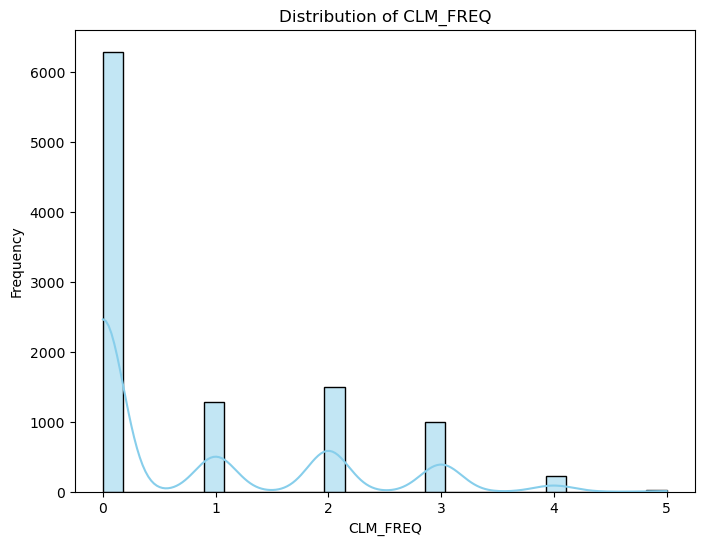

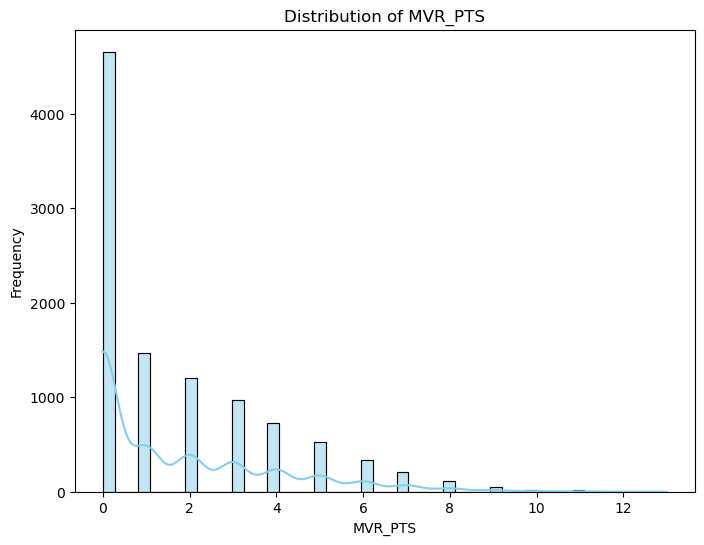

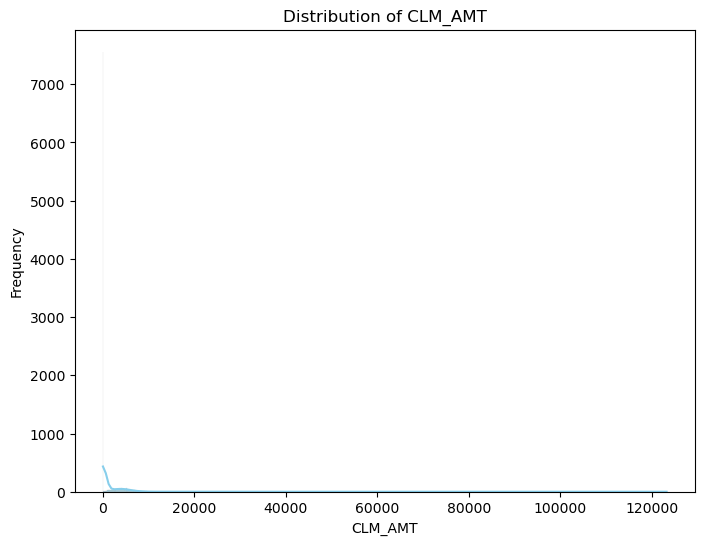

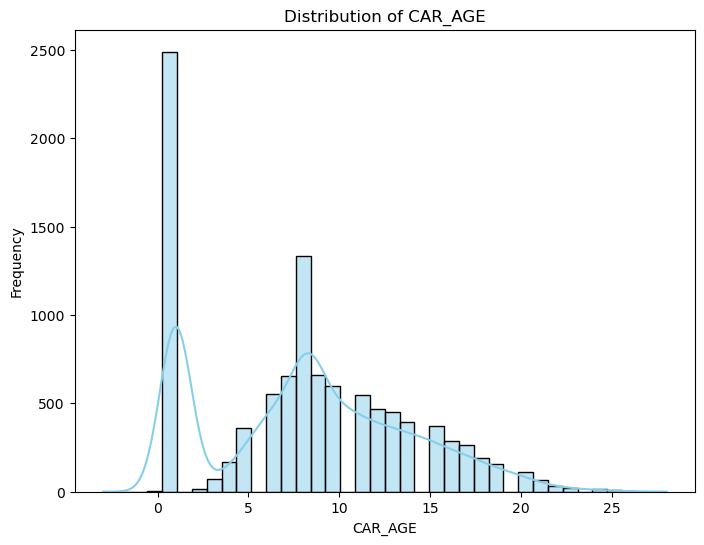

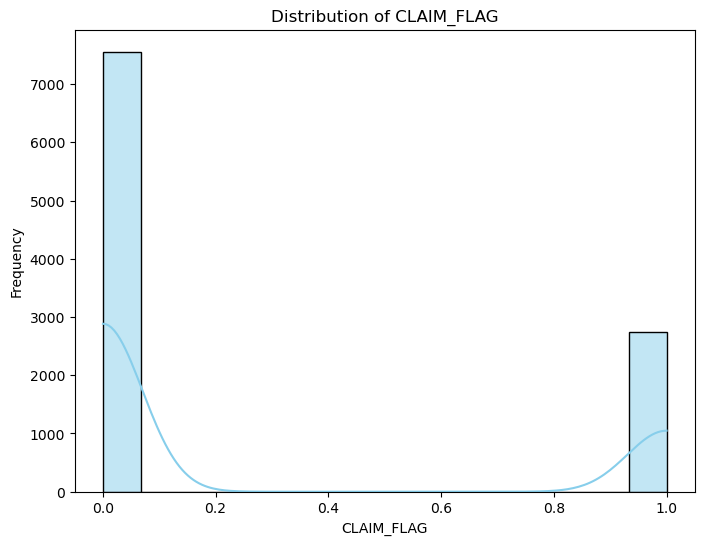

In [10]:
# Visualize distributions and correlation matrix
numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()

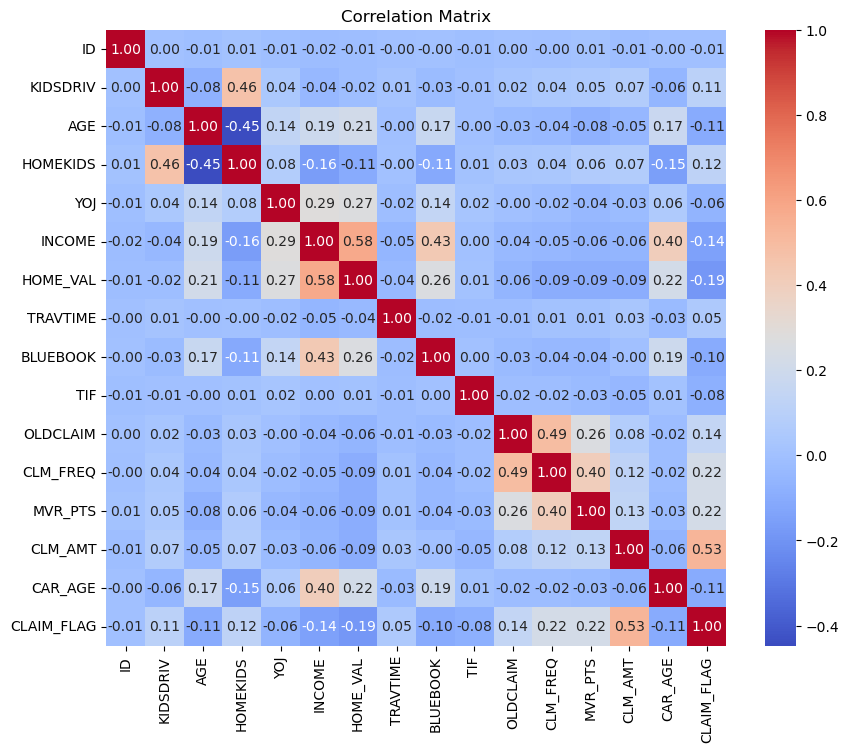

In [11]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [12]:
# Feature engineering
winsorized_columns = ['INCOME', 'HOME_VAL', 'OLDCLAIM', 'CLM_AMT']
for col in winsorized_columns:
    percentile_95 = np.percentile(df[col].dropna(), 95)
    df[col] = np.where(df[col] > percentile_95, percentile_95, df[col])

clipped_columns = ['AGE', 'YOJ', 'TRAVTIME', 'CAR_AGE']
for col in clipped_columns:
    threshold = df[col].quantile(0.95)
    df[col] = df[col].clip(upper=threshold)

In [13]:
df.head(5)

,ID,KIDSDRIV,BIRTH,AGE,HOMEKIDS,YOJ,INCOME,PARENT1,HOME_VAL,MSTATUS,...,CAR_TYPE,RED_CAR,OLDCLAIM,CLM_FREQ,REVOKED,MVR_PTS,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY
0,63581743,0,16MAR39,59.0,0,11.0,67349.0,No,0.0,z_No,...,Minivan,yes,4461.0,2,No,3,0.0,18.0,0,Highly Urban/ Urban
1,132761049,0,21JAN56,43.0,0,11.0,91449.0,No,257252.0,z_No,...,Minivan,yes,0.0,0,No,0,0.0,1.0,0,Highly Urban/ Urban
2,921317019,0,18NOV51,48.0,0,11.0,52881.0,No,0.0,z_No,...,Van,yes,0.0,0,No,2,0.0,10.0,0,Highly Urban/ Urban
3,727598473,0,05MAR64,35.0,1,10.0,16039.0,No,124191.0,Yes,...,z_SUV,no,26868.8,2,No,3,0.0,10.0,0,Highly Urban/ Urban
4,450221861,0,05JUN48,51.0,0,14.0,NaN,No,306251.0,Yes,...,Minivan,yes,0.0,0,No,0,0.0,6.0,0,Highly Urban/ Urban


In [14]:
df['AGE_GROUP'] = pd.cut(df['AGE'], bins=[0, 25, 40, 60, np.inf], labels=['Young', 'Adult', 'Middle-aged', 'Senior'])
df['INCOME_PER_YEAR'] = df['INCOME'] / df['YOJ']
df['HOME_VAL_INCOME_RATIO'] = df['HOME_VAL'] / df['INCOME']
df['OLDCLAIM_INCOME_RATIO'] = df['OLDCLAIM'] / df['INCOME']
df['CLAIM_FREQ_AMT_RATIO'] = df['CLM_FREQ'] / df['CLM_AMT']
df['MARRIED_WITH_KIDS'] = np.where((df['MSTATUS'] == 'Married') & (df['PARENT1'] == 'Yes'), 1, 0)

In [15]:
old_variables = ['AGE', 'INCOME', 'YOJ', 'HOME_VAL', 'OLDCLAIM', 'CLM_FREQ', 'MSTATUS', 'PARENT1']
df.drop(old_variables, axis=1, inplace=True)

In [16]:
string_columns = ['GENDER', 'EDUCATION', 'OCCUPATION', 'URBANICITY', 'CAR_TYPE']
for col in string_columns:
    df[col] = df[col].str.replace('z_', '')

In [17]:
df.head(5)

,ID,KIDSDRIV,BIRTH,HOMEKIDS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,...,CLM_AMT,CAR_AGE,CLAIM_FLAG,URBANICITY,AGE_GROUP,INCOME_PER_YEAR,HOME_VAL_INCOME_RATIO,OLDCLAIM_INCOME_RATIO,CLAIM_FREQ_AMT_RATIO,MARRIED_WITH_KIDS
0,63581743,0,16MAR39,0,M,PhD,Professional,14,Private,14230.0,...,0.0,18.0,0,Highly Urban/ Urban,Middle-aged,6122.636364,0.000000,0.066237,inf,0
1,132761049,0,21JAN56,0,M,High School,Blue Collar,22,Commercial,14940.0,...,0.0,1.0,0,Highly Urban/ Urban,Middle-aged,8313.545455,2.813065,0.000000,NaN,0
2,921317019,0,18NOV51,0,M,Bachelors,Manager,26,Private,21970.0,...,0.0,10.0,0,Highly Urban/ Urban,Middle-aged,4807.363636,0.000000,0.000000,NaN,0
3,727598473,0,05MAR64,1,F,High School,Clerical,5,Private,4010.0,...,0.0,10.0,0,Highly Urban/ Urban,Adult,1603.900000,7.743064,1.675217,inf,0
4,450221861,0,05JUN48,0,M,<High School,Blue Collar,32,Private,15440.0,...,0.0,6.0,0,Highly Urban/ Urban,Middle-aged,NaN,NaN,NaN,NaN,0


In [18]:
df['CLAIM_FREQ_AMT_RATIO'].replace([np.nan, np.inf, -np.inf], np.nan, inplace=True)
mean_ratio = df['CLAIM_FREQ_AMT_RATIO'].mean()
df['CLAIM_FREQ_AMT_RATIO'].fillna(mean_ratio, inplace=True)

df['BIRTH_YEAR'] = '19' + df['BIRTH'].str[-2:]
df['BIRTH_YEAR'] = df['BIRTH_YEAR'].astype(int)
current_year = 2024
df['AGE'] = current_year - df['BIRTH_YEAR']
df.drop(columns=['BIRTH', 'BIRTH_YEAR'], inplace=True)

SyntaxError: unterminated string literal (detected at line 2) (1138753841.py, line 2)

In [20]:
# Encoding categorical variables
df['CAR_USE'] = df['CAR_USE'].replace({'Commercial': 1, 'Private': 0})
df['GENDER'] = df['GENDER'].replace({'M': 1, 'F': 0})
df['RED_CAR'] = df['RED_CAR'].replace({'yes': 1, 'no': 0})
df['REVOKED'] = df['REVOKED'].replace({'Yes': 1, 'No': 0})

df['CAR_USE'] = df['CAR_USE'].astype(int)
df['RED_CAR'] = df['RED_CAR'].astype(int)
df['REVOKED'] = df['REVOKED'].astype(int)
df['REVOKED'] = df['GENDER'].astype(int)

In [21]:
df.head(5)

,ID,KIDSDRIV,HOMEKIDS,GENDER,EDUCATION,OCCUPATION,TRAVTIME,CAR_USE,BLUEBOOK,TIF,...,CAR_AGE,CLAIM_FLAG,URBANICITY,AGE_GROUP,INCOME_PER_YEAR,HOME_VAL_INCOME_RATIO,OLDCLAIM_INCOME_RATIO,CLAIM_FREQ_AMT_RATIO,MARRIED_WITH_KIDS,AGE
0,63581743,0,0,1,PhD,Professional,14,0,14230.0,11,...,18.0,0,Highly Urban/ Urban,Middle-aged,6122.636364,0.000000,0.066237,0.000502,0,85
1,132761049,0,0,1,High School,Blue Collar,22,1,14940.0,1,...,1.0,0,Highly Urban/ Urban,Middle-aged,8313.545455,2.813065,0.000000,0.000502,0,68
2,921317019,0,0,1,Bachelors,Manager,26,0,21970.0,1,...,10.0,0,Highly Urban/ Urban,Middle-aged,4807.363636,0.000000,0.000000,0.000502,0,73
3,727598473,0,1,0,High School,Clerical,5,0,4010.0,4,...,10.0,0,Highly Urban/ Urban,Adult,1603.900000,7.743064,1.675217,0.000502,0,60
4,450221861,0,0,1,<High School,Blue Collar,32,0,15440.0,7,...,6.0,0,Highly Urban/ Urban,Middle-aged,NaN,NaN,NaN,0.000502,0,76


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10302 entries, 0 to 10301
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype   
---  ------                 --------------  -----   
 0   ID                     10302 non-null  int64   
 1   KIDSDRIV               10302 non-null  int64   
 2   HOMEKIDS               10302 non-null  int64   
 3   GENDER                 10302 non-null  int64   
 4   EDUCATION              10302 non-null  object  
 5   OCCUPATION             9637 non-null   object  
 6   TRAVTIME               10302 non-null  int64   
 7   CAR_USE                10302 non-null  int64   
 8   BLUEBOOK               10302 non-null  float64 
 9   TIF                    10302 non-null  int64   
 10  CAR_TYPE               10302 non-null  object  
 11  RED_CAR                10302 non-null  int64   
 12  REVOKED                10302 non-null  int64   
 13  MVR_PTS                10302 non-null  int64   
 14  CLM_AMT                10302 non-null 

In [23]:
# Perform one-hot encoding on categorical variables
df_encoded = pd.get_dummies(df, columns=['GENDER', 'EDUCATION', 'OCCUPATION', 'URBANICITY', 'AGE_GROUP'])

In [24]:
df_encoded.head()

,ID,KIDSDRIV,HOMEKIDS,TRAVTIME,CAR_USE,BLUEBOOK,TIF,CAR_TYPE,RED_CAR,REVOKED,...,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,URBANICITY_Highly Rural/ Rural,URBANICITY_Highly Urban/ Urban,AGE_GROUP_Young,AGE_GROUP_Adult,AGE_GROUP_Middle-aged,AGE_GROUP_Senior
0,63581743,0,0,14,0,14230.0,11,Minivan,1,1,...,0,0,1,0,0,1,0,0,1,0
1,132761049,0,0,22,1,14940.0,1,Minivan,1,1,...,0,0,0,0,0,1,0,0,1,0
2,921317019,0,0,26,0,21970.0,1,Van,1,1,...,0,1,0,0,0,1,0,0,1,0
3,727598473,0,1,5,0,4010.0,4,SUV,0,0,...,0,0,0,0,0,1,0,1,0,0
4,450221861,0,0,32,0,15440.0,7,Minivan,1,1,...,0,0,0,0,0,1,0,0,1,0


In [25]:
df_encoded.drop(columns=['ID', 'CAR_TYPE'], inplace=True)
df_encoded.head()

,KIDSDRIV,HOMEKIDS,TRAVTIME,CAR_USE,BLUEBOOK,TIF,RED_CAR,REVOKED,MVR_PTS,CLM_AMT,...,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,URBANICITY_Highly Rural/ Rural,URBANICITY_Highly Urban/ Urban,AGE_GROUP_Young,AGE_GROUP_Adult,AGE_GROUP_Middle-aged,AGE_GROUP_Senior
0,0,0,14,0,14230.0,11,1,1,3,0.0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,22,1,14940.0,1,1,1,0,0.0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,26,0,21970.0,1,1,1,2,0.0,...,0,1,0,0,0,1,0,0,1,0
3,0,1,5,0,4010.0,4,0,0,3,0.0,...,0,0,0,0,0,1,0,1,0,0
4,0,0,32,0,15440.0,7,1,1,0,0.0,...,0,0,0,0,0,1,0,0,1,0


In [26]:
# Find rows with infinite values
rows_with_infinite = df_encoded[~np.isfinite(df_encoded).all(axis=1)]

# Remove rows with infinite values
df_cleaned = df_encoded[np.isfinite(df_encoded).all(axis=1)]

df_cleaned.info(5)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 8445 entries, 0 to 10301
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   KIDSDRIV                        8445 non-null   int64  
 1   HOMEKIDS                        8445 non-null   int64  
 2   TRAVTIME                        8445 non-null   int64  
 3   CAR_USE                         8445 non-null   int64  
 4   BLUEBOOK                        8445 non-null   float64
 5   TIF                             8445 non-null   int64  
 6   RED_CAR                         8445 non-null   int64  
 7   REVOKED                         8445 non-null   int64  
 8   MVR_PTS                         8445 non-null   int64  
 9   CLM_AMT                         8445 non-null   float64
 10  CAR_AGE                         8445 non-null   float64
 11  CLAIM_FLAG                      8445 non-null   int64  
 12  INCOME_PER_YEAR                 8

In [28]:
df_cleaned.head(5)

,KIDSDRIV,HOMEKIDS,TRAVTIME,CAR_USE,BLUEBOOK,TIF,RED_CAR,REVOKED,MVR_PTS,CLM_AMT,...,OCCUPATION_Lawyer,OCCUPATION_Manager,OCCUPATION_Professional,OCCUPATION_Student,URBANICITY_Highly Rural/ Rural,URBANICITY_Highly Urban/ Urban,AGE_GROUP_Young,AGE_GROUP_Adult,AGE_GROUP_Middle-aged,AGE_GROUP_Senior
0,0,0,14,0,14230.0,11,1,1,3,0.0,...,0,0,1,0,0,1,0,0,1,0
1,0,0,22,1,14940.0,1,1,1,0,0.0,...,0,0,0,0,0,1,0,0,1,0
2,0,0,26,0,21970.0,1,1,1,2,0.0,...,0,1,0,0,0,1,0,0,1,0
3,0,1,5,0,4010.0,4,0,0,3,0.0,...,0,0,0,0,0,1,0,1,0,0
5,0,0,36,0,18000.0,1,0,0,3,0.0,...,0,0,0,0,0,1,0,0,1,0


In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score


In [30]:
# Split the data into features (X) and target variable (y)
X = df_cleaned.drop(columns=['CLAIM_FLAG'])
y = df_cleaned['CLAIM_FLAG']

In [31]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [32]:
# Initialize models
models = {
    'Random Forest': RandomForestClassifier(),
    'Logistic Regression': LogisticRegression(),
    'K Nearest Neighbors': KNeighborsClassifier(),
    'Support Vector Machine': SVC(),
    'Decision Tree': DecisionTreeClassifier()
}

In [33]:
# Train and evaluate models
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}


/Users/shubham/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [35]:
# Initialize the logistic regression model with a higher max_iter value
logistic_regression_model = LogisticRegression(max_iter=1000)

# Train and evaluate the model
logistic_regression_model.fit(X_train, y_train)
y_pred = logistic_regression_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Store the results
results['Logistic Regression'] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

In [36]:
print(results)

{'Random Forest': {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}, 'Logistic Regression': {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}, 'K Nearest Neighbors': {'Accuracy': 0.9798697454114861, 'Precision': 1.0, 'Recall': 0.9160493827160494, 'F1 Score': 0.9561855670103093}, 'Support Vector Machine': {'Accuracy': 0.9905269390171699, 'Precision': 1.0, 'Recall': 0.9604938271604938, 'F1 Score': 0.9798488664987405}, 'Decision Tree': {'Accuracy': 1.0, 'Precision': 1.0, 'Recall': 1.0, 'F1 Score': 1.0}}


In [34]:
# Summarize results
results_df = pd.DataFrame(results)
print(results_df)

           Random Forest  Logistic Regression  K Nearest Neighbors  \
Accuracy             1.0                  1.0             0.979870   
Precision            1.0                  1.0             1.000000   
Recall               1.0                  1.0             0.916049   
F1 Score             1.0                  1.0             0.956186   

           Support Vector Machine  Decision Tree  
Accuracy                 0.990527            1.0  
Precision                1.000000            1.0  
Recall                   0.960494            1.0  
F1 Score                 0.979849            1.0  


In [38]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score


In [39]:
# Loop through each model
for name, model in models.items():
    # Perform cross-validation
    cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    cv_accuracy = cv_scores.mean()

    # Fit the model
    model.fit(X_train, y_train)
    
    # Predict on the test set
    y_pred = model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Store results
    results[name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1}

    # Print results
    print(f"Model: {name}")
    print(f"Cross-Validation Accuracy: {cv_accuracy}")
    print(f"Test Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"F1 Score: {f1}")
    
    # Print confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
    print("="*50)

    # Perform hyperparameter tuning using GridSearchCV
    if name in ['Random Forest', 'Logistic Regression', 'Support Vector Machine']:
        params = {}  # Define the hyperparameters to tune
        grid_search = GridSearchCV(model, params, cv=5, scoring='accuracy')
        grid_search.fit(X_train, y_train)
        best_params = grid_search.best_params_
        best_score = grid_search.best_score_
        
        print(f"Best Parameters: {best_params}")
        print(f"Best Cross-Validation Accuracy: {best_score}")
        print("="*50)
        

Model: Random Forest
Cross-Validation Accuracy: 0.9997039230199853
Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[1284    0]
 [   0  405]]
Best Parameters: {}
Best Cross-Validation Accuracy: 0.9997039230199853


/Users/shubham/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shubham/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Model: Logistic Regression
Cross-Validation Accuracy: 0.9998519615099927
Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[1284    0]
 [   0  405]]


/Users/shubham/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/shubham/anaconda3/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logisti

Best Parameters: {}
Best Cross-Validation Accuracy: 0.9998519615099927
Model: K Nearest Neighbors
Cross-Validation Accuracy: 0.9782414078547996
Test Accuracy: 0.9798697454114861
Precision: 1.0
Recall: 0.9160493827160494
F1 Score: 0.9561855670103093
Confusion Matrix:
[[1284    0]
 [  34  371]]
Model: Support Vector Machine
Cross-Validation Accuracy: 0.9869744743100661
Test Accuracy: 0.9905269390171699
Precision: 1.0
Recall: 0.9604938271604938
F1 Score: 0.9798488664987405
Confusion Matrix:
[[1284    0]
 [  16  389]]
Best Parameters: {}
Best Cross-Validation Accuracy: 0.9869744743100661
Model: Decision Tree
Cross-Validation Accuracy: 1.0
Test Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0
Confusion Matrix:
[[1284    0]
 [   0  405]]


In [40]:
from sklearn.ensemble import RandomForestClassifier

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier()

# Fit the classifier to your training data
rf_classifier.fit(X_train, y_train)

# Get feature importances
feature_importances = rf_classifier.feature_importances_

# Pair feature names with their importance scores
feature_importance_dict = dict(zip(X_train.columns, feature_importances))

# Sort features by importance score (descending order)
sorted_features = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print the top n features
n_top_features = 5  # Change this value as needed
print(f"Top {n_top_features} features:")
for feature, importance in sorted_features[:n_top_features]:
    print(f"{feature}: {importance}")

Top 5 features:
CLM_AMT: 0.6132881419516736
CLAIM_FREQ_AMT_RATIO: 0.2857567526720913
OLDCLAIM_INCOME_RATIO: 0.019889351651581483
URBANICITY_Highly Urban/ Urban: 0.012162034406031415
URBANICITY_Highly Rural/ Rural: 0.008091486364793756
